### Part 3 : K-Means clustering based on the number of apartments and the number of <br>supermarkets  near each subway station


In [1]:
import pandas as pd
import numpy as np
from geopy.distance import geodesic
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import folium # map rendering library

from sklearn.cluster import KMeans 
from scipy.spatial.distance import cdist

import matplotlib.pyplot as plt


#### Load data on the number of apartments in the neighborhood and the number of supermarkets for each subway station. <br>Remove columns that are not needed for clustering

In [2]:
df0 = pd.read_csv('dfs.csv')

In [3]:
df0.head()

,Unnamed: 0,Unnamed: 0.1,Station_Name,LINE,lat,lng,numuni,num_super
0,0,0,Astor Pl,4-6-6 Express,40.730054,-73.991070,27,4
1,1,1,Canal St,4-6-6 Express,40.718814,-74.001055,17,8
2,2,2,50th St,1-2,40.762456,-73.985984,46,4
3,3,3,Bergen St,2-3-4,40.686111,-73.990756,30,2
4,4,4,Pennsylvania Ave,3-4,40.664714,-73.894886,0,3


In [4]:
columns = ['Station_Name','lat','lng','numuni','num_super']
df1 = pd.DataFrame(columns = columns)
df1

,Station_Name,lat,lng,numuni,num_super


In [5]:
df0.drop(df0.filter(regex="Unname"),axis=1, inplace=True)


In [6]:
df0.columns

Index(['Station_Name', 'LINE', 'lat', 'lng', 'numuni', 'num_super'], dtype='object')

In [7]:
df1['Station_Name'] = df0['Station_Name']
df1['lat'] = df0['lat']
df1['lng'] = df0['lng']
df1['numuni'] = df0['numuni']
df1['num_super'] = df0['num_super']

In [8]:
df1.head()

,Station_Name,lat,lng,numuni,num_super
0,Astor Pl,40.730054,-73.991070,27,4
1,Canal St,40.718814,-74.001055,17,8
2,50th St,40.762456,-73.985984,46,4
3,Bergen St,40.686111,-73.990756,30,2
4,Pennsylvania Ave,40.664714,-73.894886,0,3


In [9]:
df0.drop(columns=['Station_Name','LINE','lat','lng'],inplace=True)

In [10]:
df0.head()

,numuni,num_super
0,27,4
1,17,8
2,46,4
3,30,2
4,0,3


#### Normalize the each columns by the maximum number of apartments and the maximum number of supermarkets

In [11]:
numuni_max = df0.numuni.max()
num_super_max = df0.num_super.max()

df0['numuni'] = df0['numuni'] / numuni_max
df0['num_super'] = df0['num_super'] / num_super_max

df0

,numuni,num_super
0,0.380282,0.285714
1,0.239437,0.571429
2,0.647887,0.285714
3,0.422535,0.142857
4,0.000000,0.214286
...,...,...
468,0.000000,0.000000
469,0.042254,0.071429
470,0.507042,0.142857
471,0.521127,0.357143


#### Perform clustering using the K-Means method, up to 17 clusters, and to obtain the disotrtion values

In [12]:
distortions = []
K = range(1,17)
 
for k in K:
  kmeans = KMeans(n_clusters=k, max_iter=1000,tol=1e-4,random_state=761).fit(df0)

  distortions.append(sum(np.min(cdist(df0, kmeans.cluster_centers_,
                                        'euclidean'), axis=1)) / len(df0))
distortions

[0.20343727580640214,
 0.14439059279424576,
 0.11798234211047462,
 0.10214165895001198,
 0.09023276544570816,
 0.07879649775003464,
 0.07711954598882459,
 0.06987187784353714,
 0.06418405014833917,
 0.060781661220703345,
 0.059033309334496076,
 0.056323344223402905,
 0.05400119393222299,
 0.0538973720080767,
 0.04393412060191747,
 0.04904931682419178]

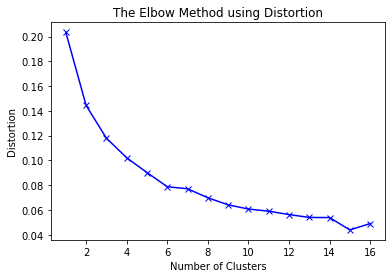

In [13]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

####  To determine the appropriate number of clusters by elbow method, 6 is the number of clusters <br>that will result in a gradual change in the K value in the graph.


In [14]:
k = 6
kmeans = KMeans(n_clusters=k, max_iter=1000,tol=1e-4,random_state=761).fit(df0)
kmeans.labels_

array([2, 1, 4, 2, 5, 3, 1, 0, 5, 3, 4, 0, 3, 5, 0, 3, 3, 3, 3, 5, 5, 5,
       3, 3, 1, 3, 3, 5, 5, 3, 2, 3, 2, 5, 3, 0, 1, 3, 3, 3, 3, 0, 3, 3,
       3, 0, 3, 3, 2, 3, 3, 3, 3, 5, 5, 2, 2, 5, 3, 3, 0, 3, 3, 3, 5, 5,
       3, 5, 3, 0, 5, 3, 5, 3, 3, 3, 4, 5, 5, 3, 2, 5, 3, 4, 0, 2, 5, 0,
       3, 1, 3, 2, 5, 2, 3, 2, 2, 5, 3, 3, 0, 0, 0, 3, 0, 2, 3, 2, 3, 5,
       0, 5, 5, 1, 0, 0, 3, 1, 2, 2, 0, 0, 5, 3, 3, 3, 0, 2, 0, 0, 5, 5,
       5, 0, 5, 3, 0, 2, 2, 0, 3, 0, 2, 2, 0, 4, 3, 2, 4, 2, 4, 0, 5, 3,
       3, 0, 1, 2, 5, 5, 5, 2, 0, 1, 2, 1, 0, 5, 0, 5, 5, 0, 0, 5, 3, 5,
       5, 1, 5, 5, 3, 3, 3, 3, 3, 3, 5, 5, 5, 3, 5, 3, 3, 3, 4, 3, 3, 3,
       2, 2, 3, 3, 4, 2, 3, 4, 5, 5, 3, 3, 3, 5, 3, 0, 3, 5, 3, 3, 3, 3,
       3, 5, 3, 3, 3, 3, 3, 3, 3, 5, 1, 3, 5, 5, 0, 5, 1, 3, 1, 5, 5, 3,
       3, 3, 5, 3, 5, 5, 3, 3, 5, 5, 5, 0, 3, 3, 5, 3, 3, 3, 5, 5, 5, 5,
       3, 3, 5, 3, 5, 5, 3, 3, 5, 3, 3, 3, 3, 5, 5, 3, 0, 3, 3, 3, 3, 0,
       5, 0, 3, 5, 5, 3, 3, 1, 0, 0, 3, 0, 5, 0, 0,

In [15]:
df1['category'] = kmeans.labels_
df1.head()

,Station_Name,lat,lng,numuni,num_super,category
0,Astor Pl,40.730054,-73.991070,27,4,2
1,Canal St,40.718814,-74.001055,17,8,1
2,50th St,40.762456,-73.985984,46,4,4
3,Bergen St,40.686111,-73.990756,30,2,2
4,Pennsylvania Ave,40.664714,-73.894886,0,3,5


#### The stations are shown in different colors for each cluster. 6 clusters are used, so 6 colors are used.

In [16]:
address = 'New York, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York are 40.7127281, -74.0060152.


In [17]:
clr = ['red','orange','yellow','green','blue','black'] 

In [18]:
map_ny = folium.Map(location=[latitude, longitude], zoom_start=11)

for lat, lng, cluster in zip(df1['lat'], df1['lng'], kmeans.labels_):

    folium.CircleMarker(
        [lat, lng],
        radius=2,
        color= clr[cluster],
        fill=True,
        fill_opacity=0.9,
        parse_html=False).add_to(map_ny)  
    
map_ny

#### 　The scatter plot of the number of apartments and the number of supermarkets near <br>the station is also shown in different colors for each cluster.

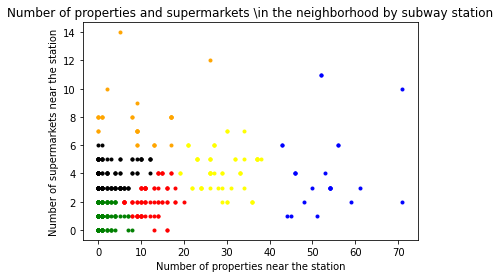

In [19]:
for i,j,k in zip(df1["numuni"],df1["num_super"],df1["category"]):
    plt.plot(i,j,color=clr[k],marker=".", linestyle="")
plt.xlabel("Number of properties near the station")
plt.ylabel("Number of supermarkets near the station")
plt.title("Number of properties and supermarkets in the neighborhood by subway station")

plt.show()


#### From the map and scatter plot, we can see that the areas with the highest number of <br>both apartments and supermarkets are Manhattan and Brooklyn.

#### From the scatter plot, the areas where business travelers search for properties and <br>investors search for properties to invest in are shown below.


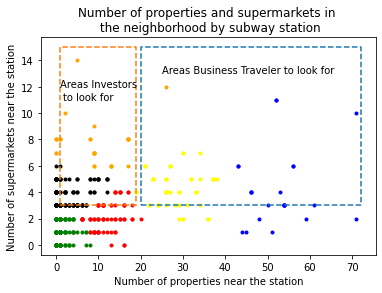

In [20]:
for i,j,k in zip(df1["numuni"],df1["num_super"],df1["category"]):
    plt.plot(i,j,color=clr[k],marker=".", linestyle="")
plt.xlabel("Number of properties near the station")
plt.ylabel("Number of supermarkets near the station")
plt.title("Number of properties and supermarkets in \n the neighborhood by subway station")

tra_x = [20,72,72,20,20]
tra_y = [ 3, 3,15,15, 3]
tra_mx = 25
tra_my = 13
tra_mm = "Areas Business Traveler to look for"
plt.plot(tra_x,tra_y,linestyle='dashed')
plt.text(tra_mx,tra_my,tra_mm)
 
inv_x = [ 1,19,19, 1, 1]
inv_y = [ 3, 3,15,15, 3]
inv_mx = 1
inv_my = 12
inv_mm = "Areas Investors"
inv_mx2 = 1.5
inv_my2 = 11
inv_mm2 = "to look for"

plt.plot(inv_x,inv_y,linestyle='dashed')
plt.text(inv_mx,inv_my,inv_mm)
plt.text(inv_mx2,inv_my2,inv_mm2)

plt.show()


#### The following map shows the subway stations where business travelers and investors can look for properties.

In [21]:
df = pd.read_csv('dfs.csv')

In [22]:
df_tra = df[(df['numuni']>= 20) & (df['num_super'] >= 3)]

In [23]:
df_inv = df[(df['numuni'] > 0) &(df['numuni'] < 20) & (df['num_super'] >= 3)]

In [24]:
map_ny_traveler = folium.Map(location=[latitude, longitude], zoom_start=11)

for lat, lng in zip(df_tra['lat'], df_tra['lng']):
    folium.CircleMarker(
        [lat, lng],
        radius=0.25,
        color= 'brown',
        fill=True,
        fill_opacity=0.9,
        parse_html=False).add_to(map_ny_traveler)  
    
map_ny_traveler

In [25]:
map_ny_traveler.save("map_ny_traveler.html")

In [26]:
map_ny_investors = folium.Map(location=[latitude, longitude], zoom_start=11)

for lat, lng in zip(df_inv['lat'], df_inv['lng']):
    folium.CircleMarker(
        [lat, lng],
        radius=0.25,
        color= 'purple',
        fill=True,
        fill_opacity=0.9,
        parse_html=False).add_to(map_ny_investors)  
    
map_ny_investors

In [27]:
map_ny_investors.save("map_ny_investors.html")